In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('/content/drive/MyDrive/california_housing_test.csv')

In [18]:
print("Dataset Shape:", df.shape)
print("\nBasic Statistics:")
print(df.describe().round(2))

print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (3000, 9)

Basic Statistics:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
count    3000.00   3000.00             3000.00      3000.00         3000.00   
mean     -119.59     35.64               28.85      2599.58          529.95   
std         1.99      2.13               12.56      2155.59          415.65   
min      -124.18     32.56                1.00         6.00            2.00   
25%      -121.81     33.93               18.00      1401.00          291.00   
50%      -118.48     34.27               29.00      2106.00          437.00   
75%      -118.02     37.69               37.00      3129.00          636.00   
max      -114.49     41.92               52.00     30450.00         5419.00   

       population  households  median_income  median_house_value  
count     3000.00     3000.00        3000.00             3000.00  
mean      1402.80      489.91           3.81           205846.28  
std       1030.54      365.42           1.8

In [19]:
median_price = df['median_house_value'].median()
df['price_category'] = (df['median_house_value'] > median_price).astype(int)

X = df.drop(['median_house_value', 'price_category'], axis=1)
y = df['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
f_scores, p_values = f_classif(X_train_scaled, y_train)
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F_Score': f_scores,
    'P_value': p_values
})
feature_scores = feature_scores.sort_values('F_Score', ascending=False)
print("\nANOVA Feature Selection Results:")
print(feature_scores)


ANOVA Feature Selection Results:
              Feature     F_Score        P_value
7       median_income  871.512324  1.182095e-163
1            latitude   43.401485   5.461567e-11
3         total_rooms   31.648327   2.062558e-08
6          households   16.670235   4.593017e-05
4      total_bedrooms    8.992294   2.739076e-03
2  housing_median_age    6.793426   9.206063e-03
0           longitude    6.140994   1.327667e-02
5          population    0.079891   7.774692e-01


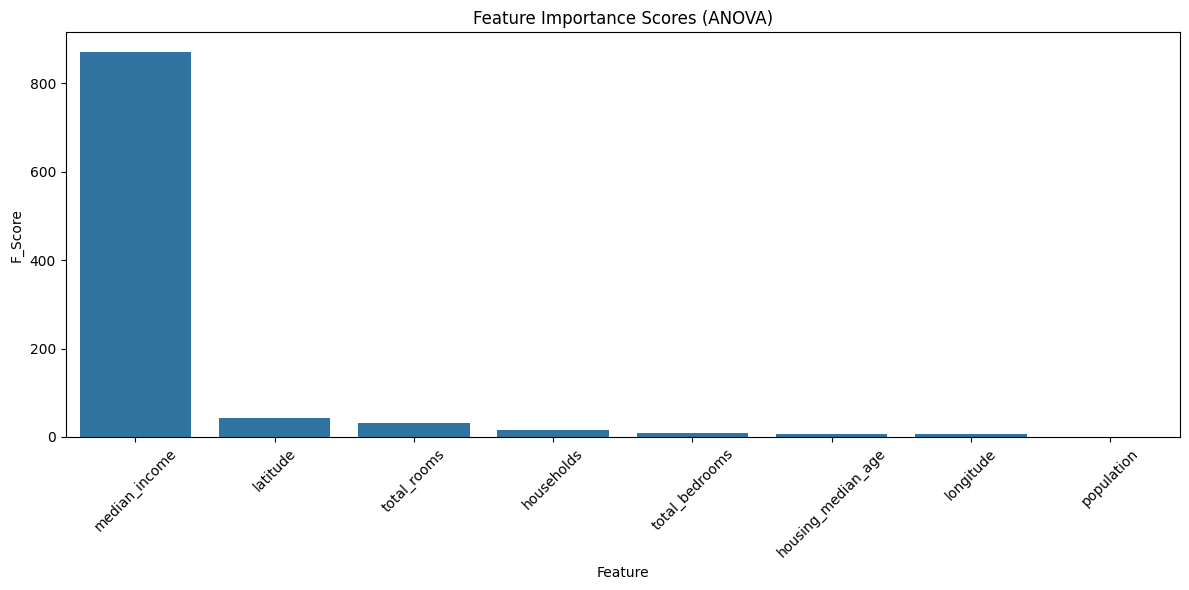

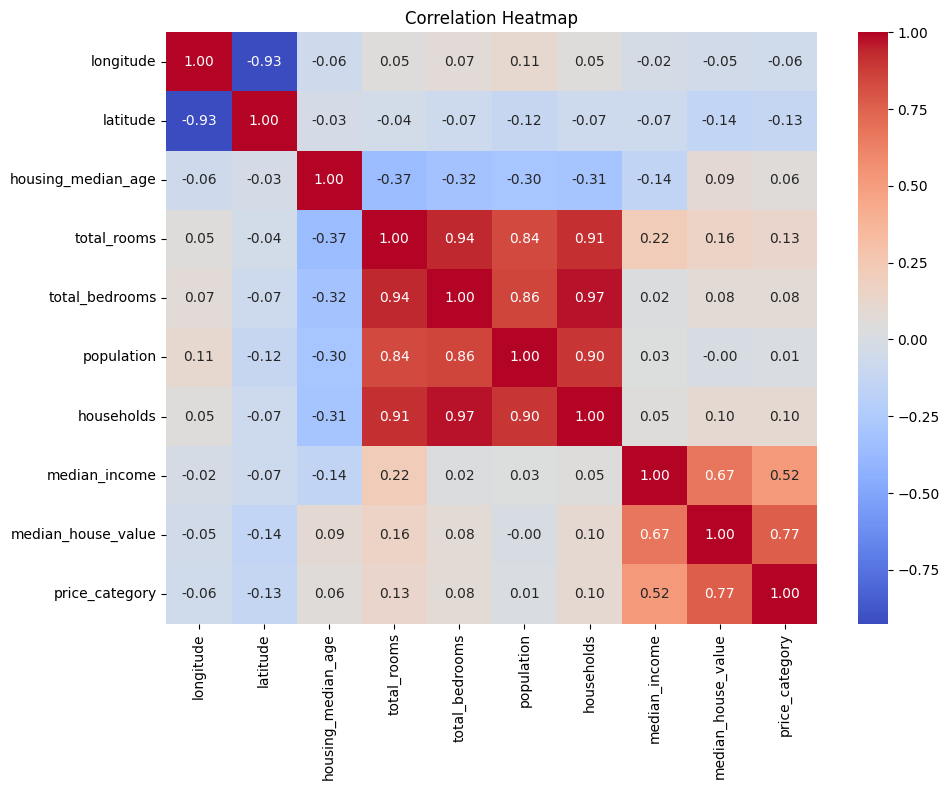

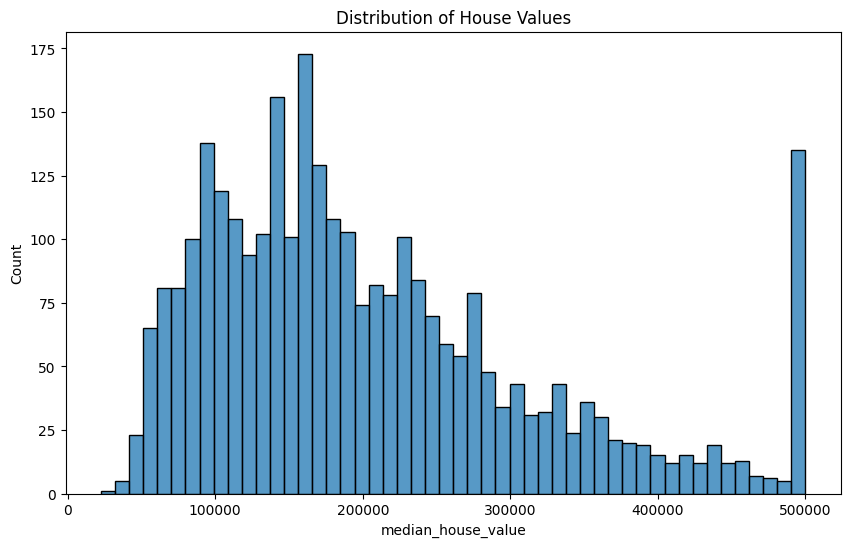

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='F_Score', data=feature_scores)
plt.xticks(rotation=45)
plt.title('Feature Importance Scores (ANOVA)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='median_house_value', bins=50)
plt.title('Distribution of House Values')
plt.show()


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       310
           1       0.84      0.80      0.82       290

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600


Random Forest Feature Importance:
              Feature  Importance
7       median_income    0.317321
1            latitude    0.164362
0           longitude    0.148264
5          population    0.085482
3         total_rooms    0.080765
6          households    0.068864
2  housing_median_age    0.068756
4      total_bedrooms    0.066186


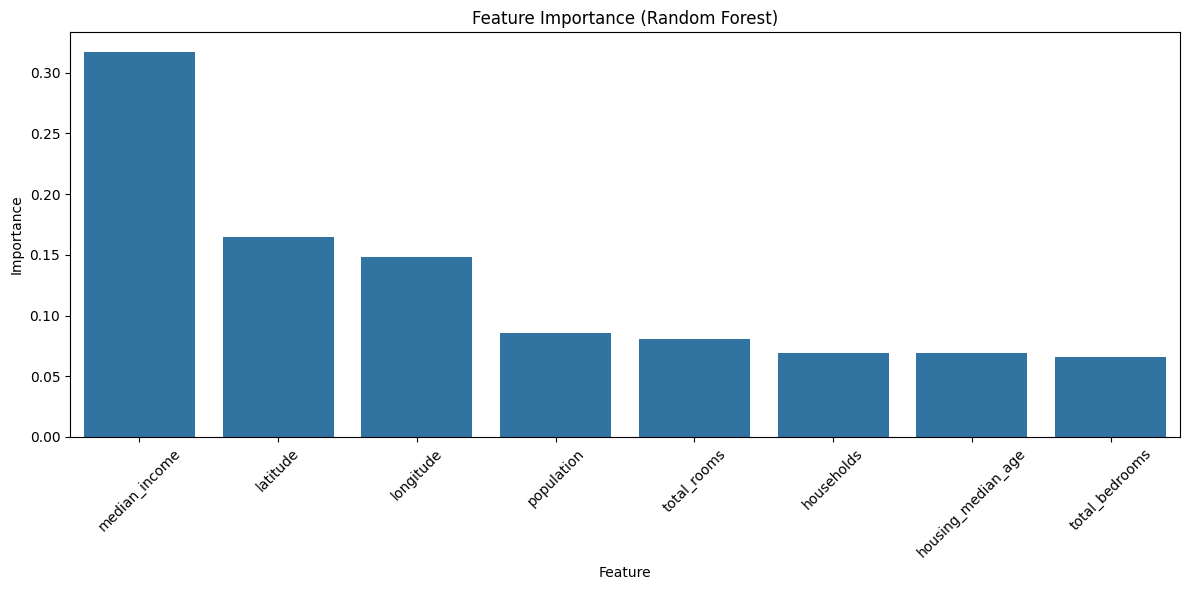

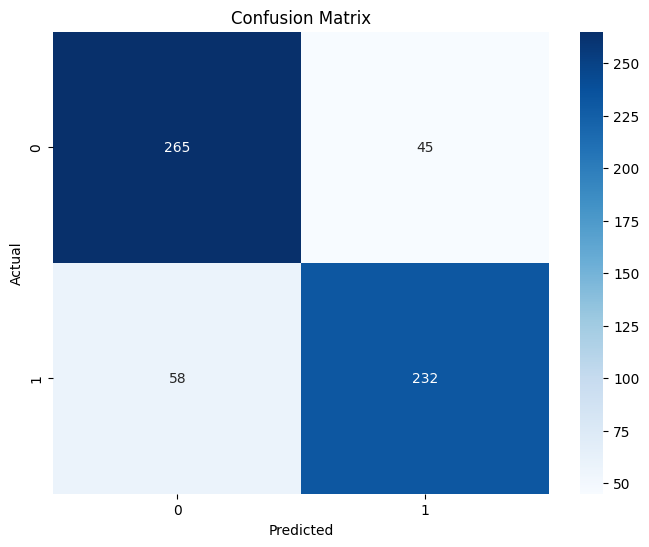

In [22]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

y_pred = rf_classifier.predict(X_test_scaled)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred))

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_classifier.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(feature_importance)

plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Importance', data=feature_importance)
plt.xticks(rotation=45)
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()